In [17]:
# 패키지 로딩하기
import pandas            as pd   # data handling and data analysis
import seaborn           as sns  # data visualization
import matplotlib.pyplot as plt  # data visualization

In [6]:
# 데이터 읽어오기
# 데이터의이름 = pandas.read_excel(io         = "directory/filename.xlsx",
#                                  sheet_name = "sheet name" or sheet index,
#                                  header     = 0)

hope = pd.read_excel(io         = "d:/GNU/hope.xlsx",
                     sheet_name = "Sheet1",
                     header     = 0)

# hope : python data : RAM에 저장되어 있음
# pd   : pandas : 패키지
# read_excel() : 함수
# io, sheet_name : 함수의 parameter

In [7]:
# 데이터 보기
# data.head() or data.tail()
hope.head()

id idol  year
0   1  강동원    30
1   2  차은우    32
2   3   김범    35
3   4  정해인    32
4   5   송강    32

In [8]:
# 데이터 저장하기 : 하드(HDD)
# 메모리(RAM)에 있는 파이썬 데이터를 하드에 저장
# data.to_excel(excel_writer = "directory/filename.xlsx",
#               header       = True,
#               index        = False)
hope.to_excel(excel_writer = "d:/GNU/hope_2022_0818_1555.xlsx",
              header       = True,
              index        = False)

### 탐색적 데이터 분석(EDA : Exploratory Data Analysis)

In [9]:
# 데이터의 종류
# 데이터 : 통계 관점

# 범주형 자료(Categorical Data) : 질적 자료 : 문자, 숫자(숫자의 의미는 없음)
# 수치형 자료(Numerical Data)   : 양적 자료 : 숫자(숫자의 의미가 있음)

In [11]:
# 예제 데이터
# diamonds = seaborn.load_dataset("diamonds")
diamonds = sns.load_dataset("diamonds")
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [12]:
# 데이터의 정보(Infomation)
# data.info()
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [13]:
# 1. 범주형 자료의 분석(1개의 열)
# (1) 표 = 빈도표(Frequency Table)
#  i. 빈도(Frequency)
# ii. 백분율(Percent) : (빈도/합계)*100(%)

In [14]:
# 범주형 자료 : cut(품질, 5개), color(색, 7개), clarity(투명도, 8개)
# i. 빈도
# data["열의이름"].value_counts()
# data.열의이름.value_counts()
diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [15]:
# ii. 백분율
# data.열의이름.value_counts(normalize = True)*100
diamonds.cut.value_counts(normalize = True)*100

Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64

In [16]:
# (2) 그래프
# i.  막대그래프(Bar Plot, Bar Chart)
# ii. 원그래프(Pie Chart) : 가금적이면 지양함

In [18]:
# i. matplotlib.pyplot.bar(x      = 범주의이름,
#                          height = 범주의빈도)
# matplotlib.pyplot.show()
cut = diamonds.cut.value_counts()
cut

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [19]:
cut.index # 범주의 이름

CategoricalIndex(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=False, dtype='category')

In [21]:
cut.values # 범주의 빈도

array([21551, 13791, 12082,  4906,  1610], dtype=int64)

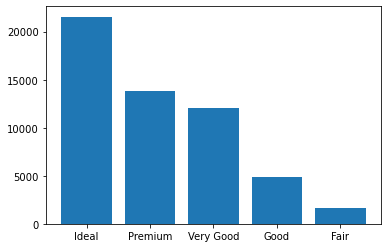

In [22]:
plt.bar(x      = cut.index,
        height = cut.values)
plt.show()

In [23]:
# 2. 수치형 자료의 분석(1개의 열)
# (1) 표 = 빈도표
# i.  구간의 빈도
# ii. 구간의 백분율

# (2) 그래프
# i.  히스토그램(Histogram)
# ii. 상자그림(Boxplot)

# (3) 기술통계량 = 요약통계량
# i.   중심 = 대표값
# ii.  퍼짐 = 산포 = 다름 : *****
# iii. 분포의 모양

In [24]:
# (1) 빈도표
# 수치형 자료를 이용해서 구간의 정보를 갖는 새로운 범주형 자료를 만듬

# 0이상 ~ 2미만 : "Light"
# 2이상 ~ 4미만 : "Middle"
# 4이상 ~ 6미만 : "Heavy"

# carat -> carat_group

# data["새로운열의이름"] = pandas.cut(data.수치형자료,
#                                     bins   = 구간의 정보,
#                                     right  = False,
#                                     labels = 구간의 이름)

diamonds["carat_group"] = pd.cut(diamonds.carat,
                                 bins   = [0, 2, 4, 6],
                                 right  = False,
                                 labels = ["Light", "Middle", "Heavy"])
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

  carat_group  
0       Light  
1       Light  
2       Light  
3       Light  
4       Light

In [25]:
diamonds.carat_group.value_counts()

Light     51786
Middle     2148
Heavy         6
Name: carat_group, dtype: int64

In [26]:
diamonds.carat_group.value_counts(normalize = True)*100

Light     96.006674
Middle     3.982202
Heavy      0.011123
Name: carat_group, dtype: float64

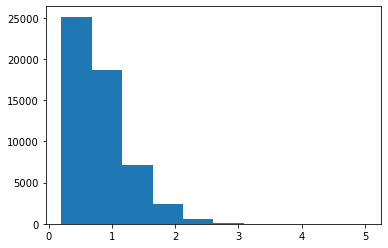

In [27]:
# (2) 데이터 시각화
# i. 히스토그램(Histogram)
# plt.hist(x    = data.수치형자료,
#          bins = 구간의 정보 또는 구간의 개수)
# plt.show()

plt.hist(x = diamonds.carat) # Sturge's Formula
plt.show()

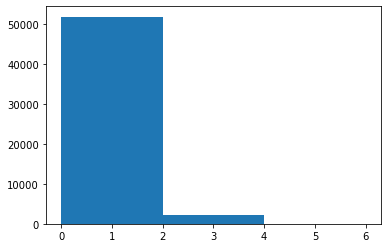

In [28]:
plt.hist(x    = diamonds.carat,
         bins = [0, 2, 4, 6]) # 구간의 정보
plt.show()

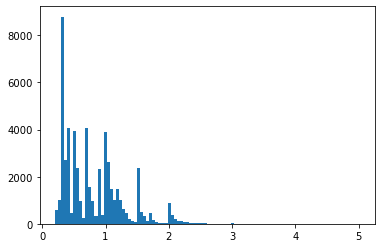

In [29]:
plt.hist(x    = diamonds.carat,
         bins = 100) # 구간의 개수
plt.show()

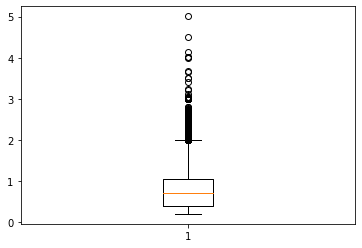

In [30]:
# ii. 상자그림(Boxplot)
# 이상치(outlier) 유무를 시각화
# plt.boxplot(x = data.수치형자료)
# plt.show()

plt.boxplot(x = diamonds.carat)
plt.show()